<a href="https://colab.research.google.com/github/adarshkapoor/INSE_6220/blob/main/INSE_6220_project_Adarsh_Kapoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1.3.5


**Upload File**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/adarshkapoor/INSE_6220/main/Brain%20Tumor%20up2.csv')
df.head(n=25)

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Correlation,Class
0,12.367233,448.155197,21.169676,0.069168,2.123972,4.748164,0.958602,0
1,10.315643,393.439331,19.835305,0.082760,2.312099,5.545425,0.964085,0
2,7.309387,299.629503,17.309809,0.109149,2.726462,7.611356,0.955245,0
3,3.538269,159.783431,12.640547,0.187170,3.893234,15.425222,0.939286,0
4,6.994415,543.625187,23.315771,0.147563,3.722482,14.167432,0.980874,0
5,18.175690,1179.352877,34.341708,0.071342,2.274175,5.355515,0.959533,0
6,13.828995,1004.439485,31.692893,0.083059,2.647450,7.161488,0.953175,0
7,8.729279,705.553829,26.562263,0.109326,3.358469,11.443823,0.951548,0
8,7.603470,564.067317,23.750101,0.166472,3.549900,12.974117,0.977672,0
9,19.535995,1186.216066,34.441488,0.062989,2.171895,4.931613,0.963146,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                211 non-null    float64
 1   Variance            211 non-null    float64
 2   Standard Deviation  211 non-null    float64
 3   Entropy             211 non-null    float64
 4   Skewness            211 non-null    float64
 5   Kurtosis            211 non-null    float64
 6   Correlation         211 non-null    float64
 7   Class               211 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


**Classes**

In [4]:
y = df['Class']
c=y.copy()
print(c)
target = df['Class'].to_numpy()

0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64


**Features**


Data Matrix

In [5]:
X = df.iloc[:,0:7]
X.head(10)

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Correlation
0,12.367233,448.155197,21.169676,0.069168,2.123972,4.748164,0.958602
1,10.315643,393.439331,19.835305,0.082760,2.312099,5.545425,0.964085
2,7.309387,299.629503,17.309809,0.109149,2.726462,7.611356,0.955245
3,3.538269,159.783431,12.640547,0.187170,3.893234,15.425222,0.939286
4,6.994415,543.625187,23.315771,0.147563,3.722482,14.167432,0.980874
5,18.175690,1179.352877,34.341708,0.071342,2.274175,5.355515,0.959533
6,13.828995,1004.439485,31.692893,0.083059,2.647450,7.161488,0.953175
7,8.729279,705.553829,26.562263,0.109326,3.358469,11.443823,0.951548
8,7.603470,564.067317,23.750101,0.166472,3.549900,12.974117,0.977672
9,19.535995,1186.216066,34.441488,0.062989,2.171895,4.931613,0.963146


In [6]:

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean,211.0,9.924745,5.410014,0.197433,5.871155,9.259155,13.494568,28.842667
Variance,211.0,748.186347,464.261627,19.323886,427.190794,644.579333,1008.636211,2568.612701
Standard Deviation,211.0,26.012113,8.479213,4.395894,20.668573,25.388567,31.758965,50.681483
Entropy,211.0,0.065743,0.065453,0.000909,0.004493,0.062343,0.108311,0.284557
Skewness,211.0,4.178903,3.069901,2.065410,2.581668,3.343828,4.513260,24.959845
Kurtosis,211.0,27.997291,69.197714,4.564218,7.077053,11.695707,21.528540,634.433356
Correlation,211.0,0.954205,0.035196,0.606712,0.945669,0.962887,0.971689,0.984755


The data here is not standardized so it needs to be standardized further


In [7]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean,211.0,3.199126e-16,1.002378,-1.802296,-0.751057,-0.123322,0.661424,3.505150
Variance,211.0,-3.535876e-16,1.002378,-1.573673,-0.693055,-0.223696,0.562332,3.930447
Standard Deviation,211.0,-3.199126e-16,1.002378,-2.555382,-0.631692,-0.073713,0.679369,2.916313
Entropy,211.0,0.000000e+00,1.002378,-0.992888,-0.938002,-0.052070,0.651911,3.351016
Skewness,211.0,-8.418753e-17,1.002378,-0.690094,-0.521526,-0.272667,0.109174,6.785354
Kurtosis,211.0,2.525626e-17,1.002378,-0.339445,-0.303045,-0.236140,-0.093704,8.784658
Correlation,211.0,-5.034414e-15,1.002378,-9.896452,-0.243082,0.247260,0.497935,0.870070


The data is standardized now


Observations and variables

In [9]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
['Mean', 'Variance', 'Standard Deviation', 'Entropy', 

Data **Visualisation**

Class Distribution

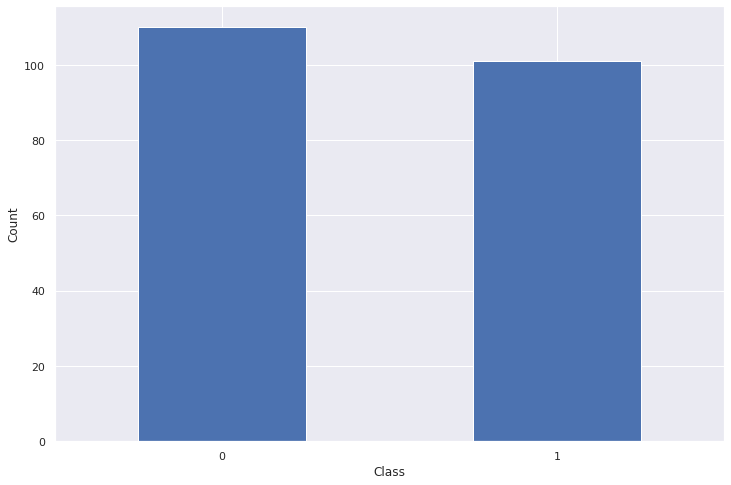

In [10]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Box and Whisker Plots

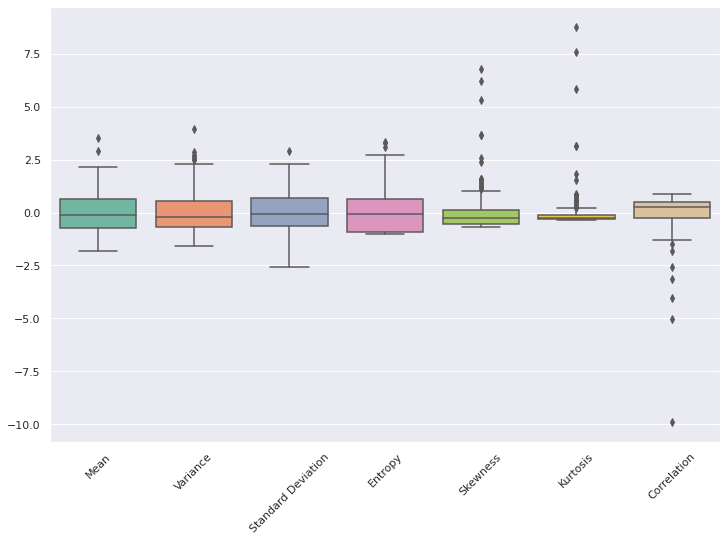

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

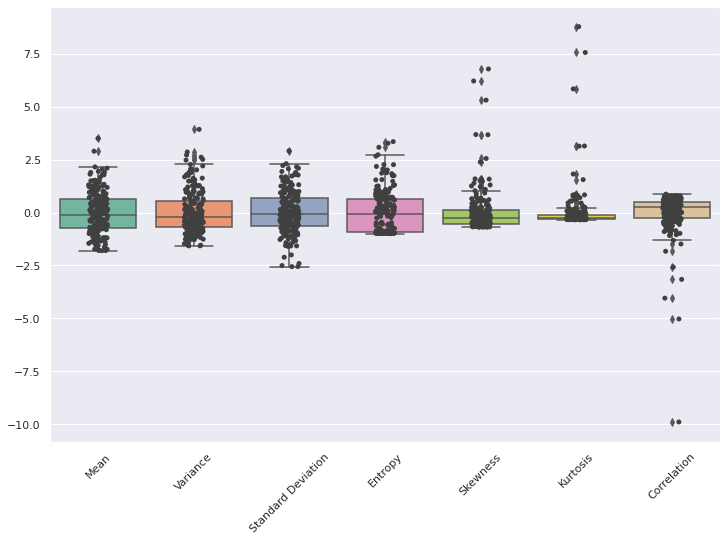

In [12]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Five Number Summary**

In [13]:
df.describe()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Correlation
count,2.110000e+02,2.110000e+02,2.110000e+02,211.000000,2.110000e+02,2.110000e+02,2.110000e+02
mean,3.199126e-16,-3.535876e-16,-3.199126e-16,0.000000,-8.418753e-17,2.525626e-17,-5.034414e-15
std,1.002378e+00,1.002378e+00,1.002378e+00,1.002378,1.002378e+00,1.002378e+00,1.002378e+00
min,-1.802296e+00,-1.573673e+00,-2.555382e+00,-0.992888,-6.900937e-01,-3.394447e-01,-9.896452e+00
25%,-7.510573e-01,-6.930552e-01,-6.316917e-01,-0.938002,-5.215260e-01,-3.030445e-01,-2.430822e-01
50%,-1.233219e-01,-2.236959e-01,-7.371313e-02,-0.052070,-2.726672e-01,-2.361400e-01,2.472596e-01
75%,6.614238e-01,5.623322e-01,6.793695e-01,0.651911,1.091736e-01,-9.370445e-02,4.979352e-01
max,3.505150e+00,3.930447e+00,2.916313e+00,3.351016,6.785354e+00,8.784658e+00,8.700702e-01


**Pair Plot**

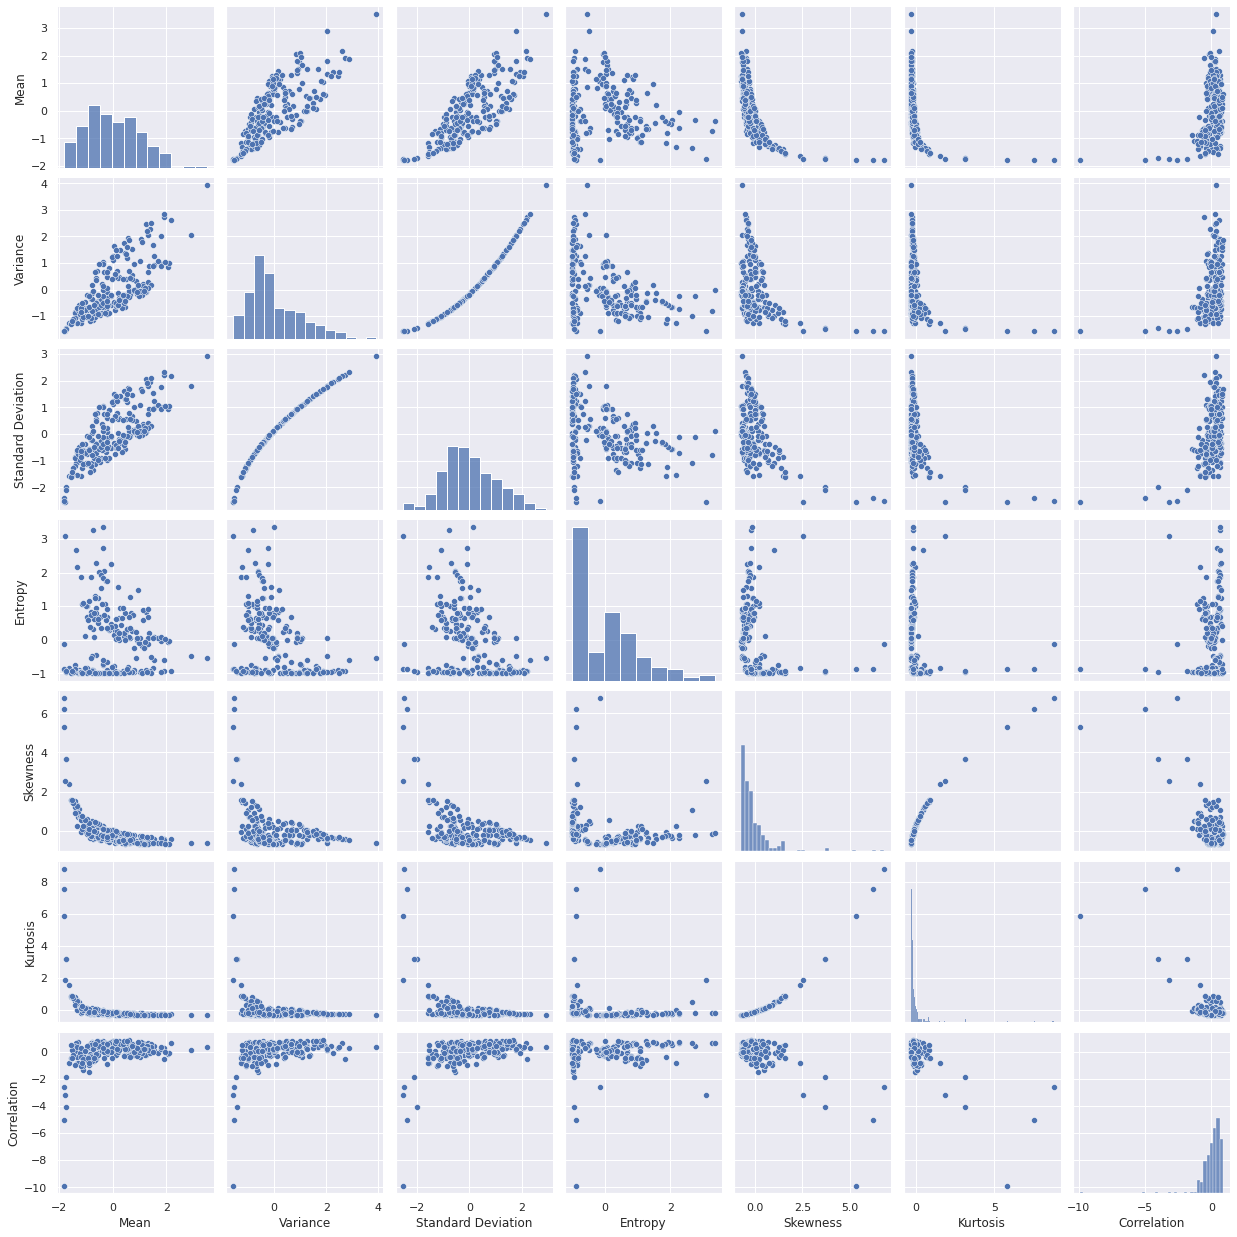

In [14]:
sns.pairplot(df)

Covariance

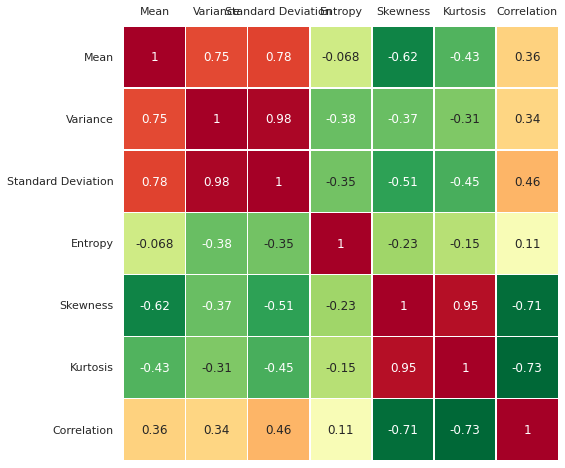

In [15]:
dfc = df - df.mean() 
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

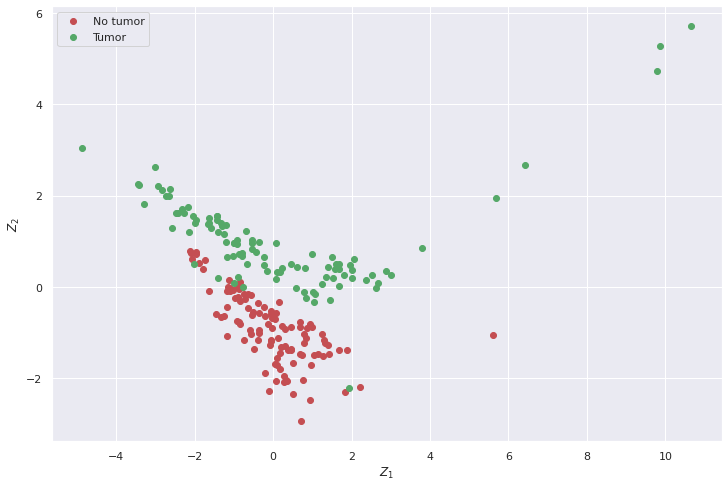

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='No tumor')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Tumor')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

Eigenvector matrix:
[[-0.41387322  0.16525544  0.49453889 -0.24527618  0.64158351  0.27226149
  -0.10447373]
 [-0.39897611  0.41516448  0.15518685  0.24564218 -0.36710633  0.1923862
   0.64207006]
 [-0.44071874  0.33137441  0.07444664  0.19085822 -0.32189506 -0.33065981
  -0.66410578]
 [ 0.04639581 -0.58197714  0.69305066  0.3369586  -0.24875937  0.03749759
  -0.04474853]
 [ 0.42721454  0.35074658  0.01554224  0.3911832  -0.01039471  0.66269817
  -0.31925194]
 [ 0.39649133  0.37361374  0.28269223  0.35882925  0.35421599 -0.58147155
   0.175943  ]
 [-0.36527222 -0.2986843  -0.40660835  0.66914037  0.40314869  0.02900395
   0.0302426 ]]


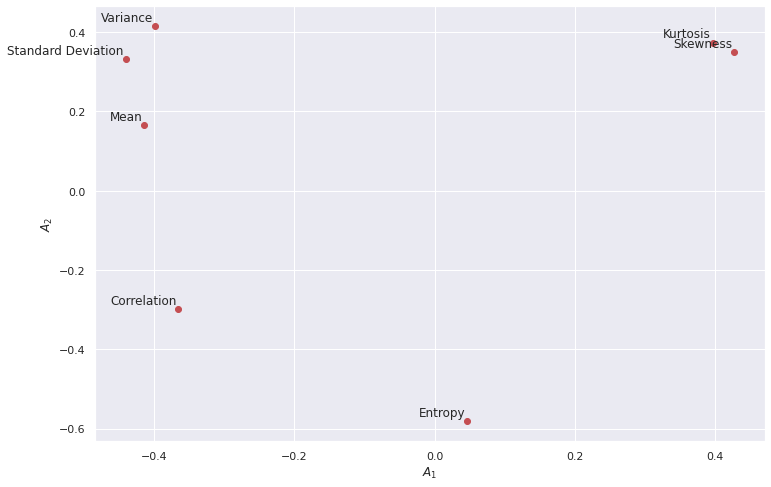

In [17]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Class, Length: 211, dtype: int64


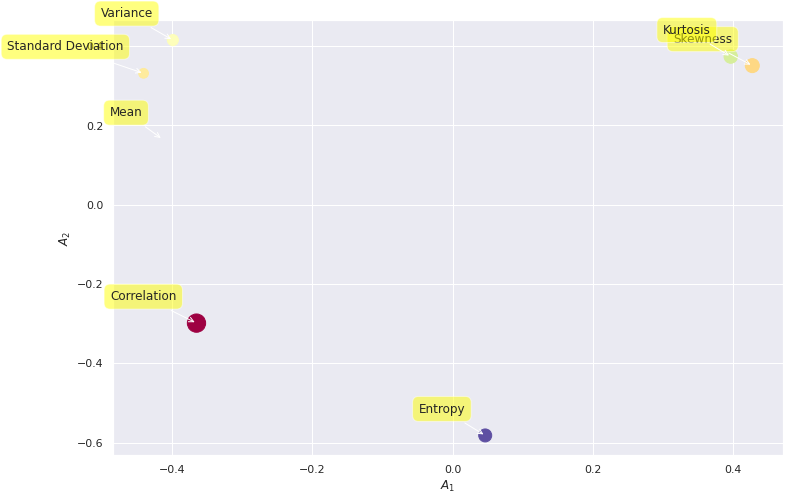

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  print(c)

Scree Plot


Eigenvalues:
[3.93546081 1.77409329 0.70621765 0.38209809 0.2063538  0.01959208
 0.00951763]


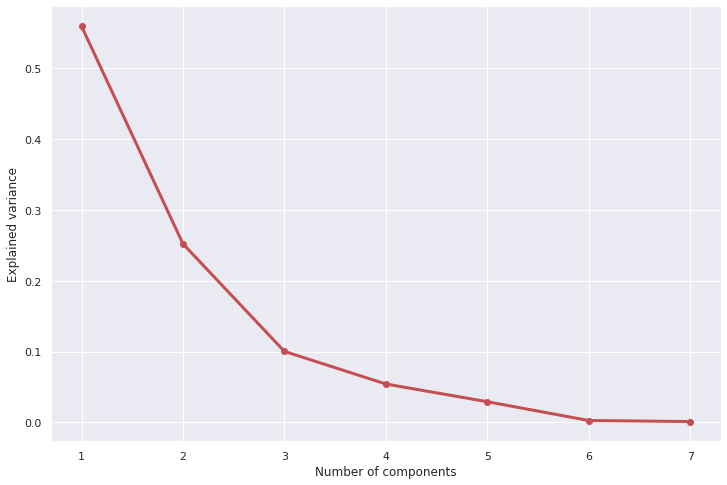

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

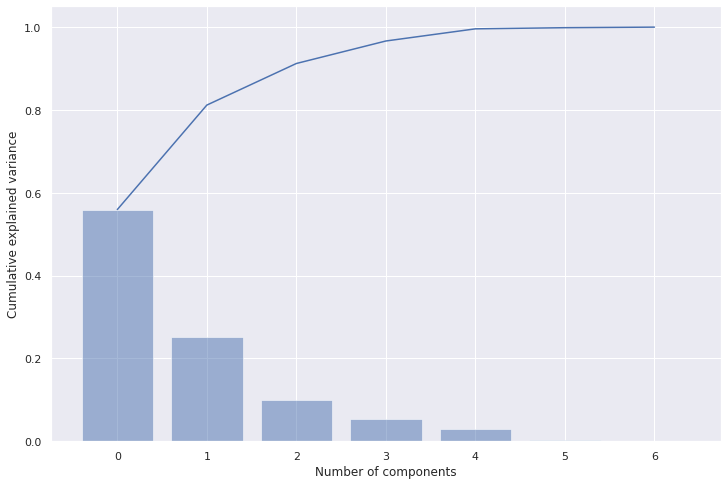

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Explained Variance per PC



In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (56.0%)',
 '1': 'PC 2 (25.2%)',
 '2': 'PC 3 (10.0%)',
 '3': 'PC 4 (5.4%)',
 '4': 'PC 5 (2.9%)',
 '5': 'PC 6 (0.3%)',
 '6': 'PC 7 (0.1%)'}

**Biplot**

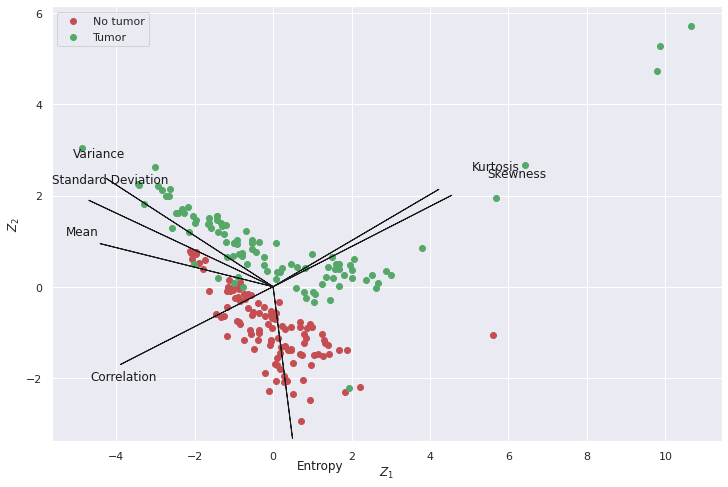

In [22]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='No tumor')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Tumor')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Using PCA Librarry

In [23]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=c720fa2331cef2e27baf67d62b6bc050946c09d18a064aba404a17368a7e744b
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=7cf3f64bb7c646c3b2ea2345ed778b5572f1c904c5fc485224b1be56b8262567
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [25]:
print(out['topfeat'])


    PC             feature   loading  type
0  PC1  Standard Deviation -0.440719  best
1  PC2             Entropy -0.581977  best
2  PC3             Entropy  0.693051  best
3  PC4         Correlation  0.669140  best
4  PC3                Mean  0.494539  weak
5  PC2            Variance  0.415164  weak
6  PC1            Skewness  0.427215  weak
7  PC1            Kurtosis  0.396491  weak


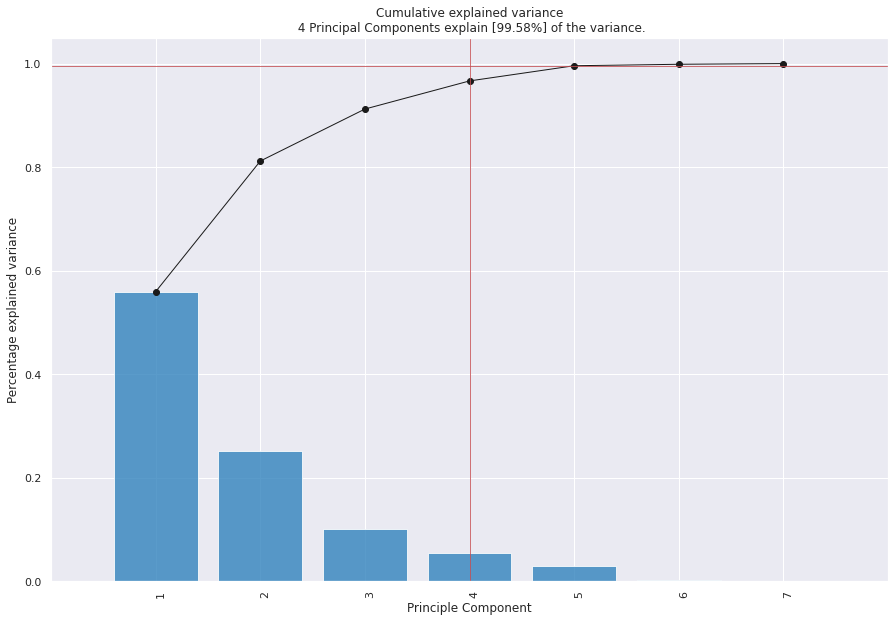

<Figure size 864x576 with 0 Axes>

In [26]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].


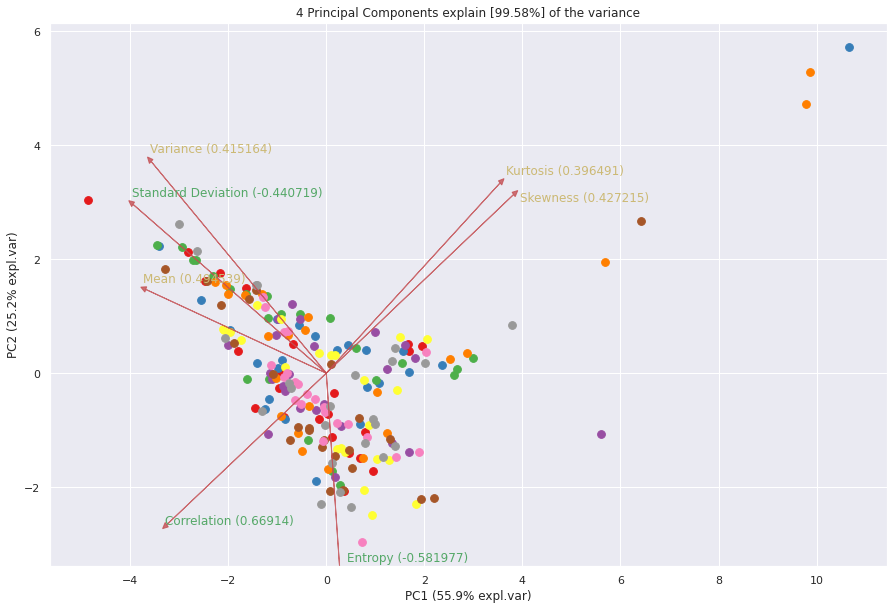

In [27]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].


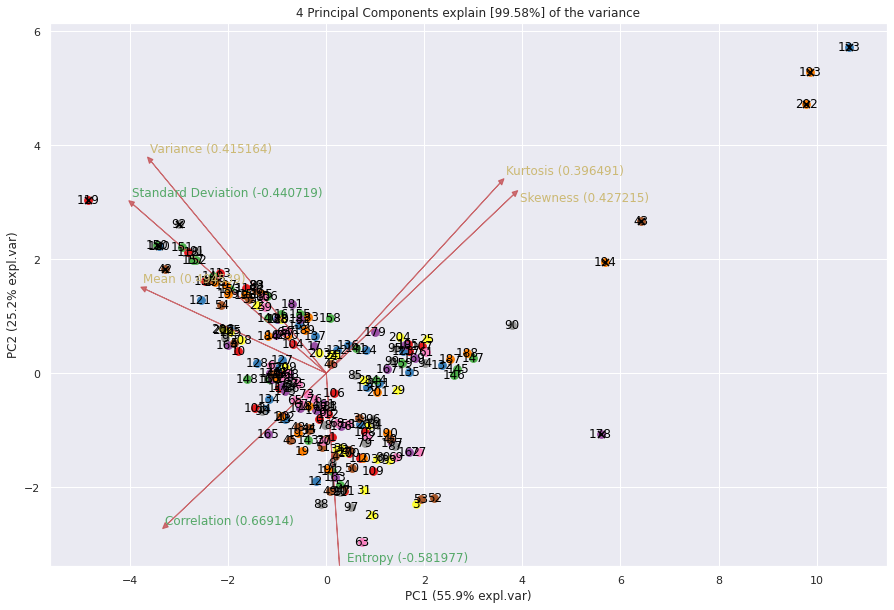

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe09e86b50>)

In [28]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


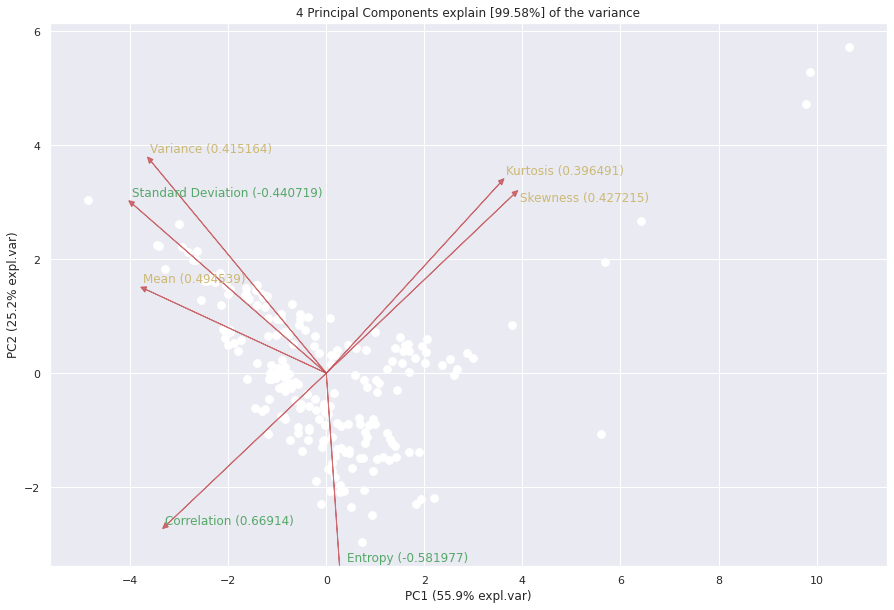

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe01f178e0>)

In [29]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [211] unique colors! Available unique colors: [9].


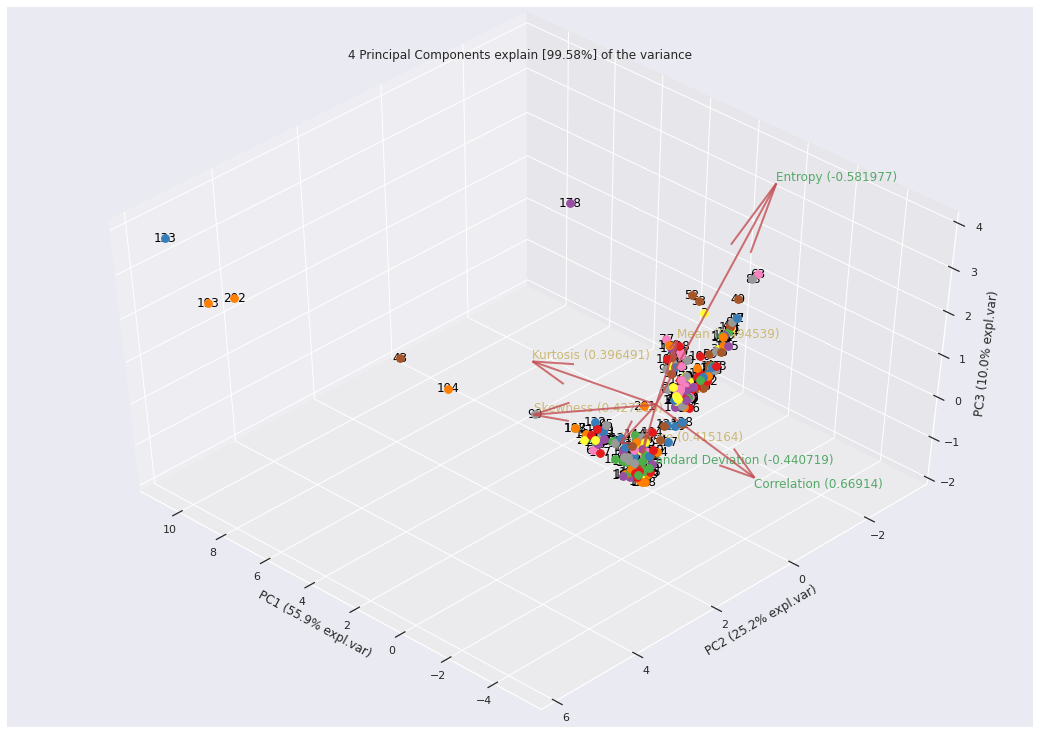

In [30]:
ax = model.biplot3d(legend=False)

**Principal components**

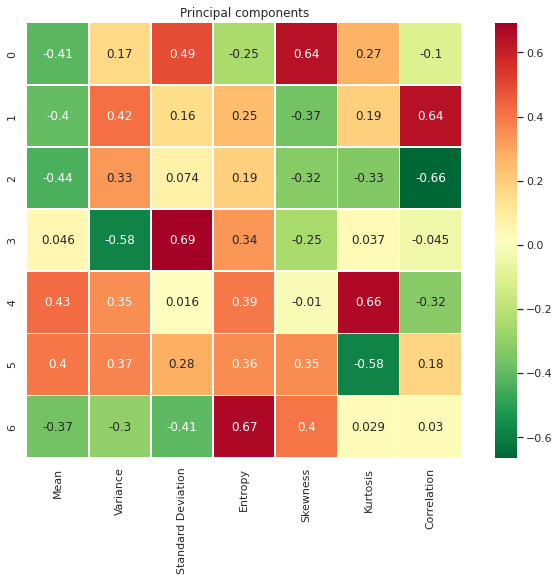

PC1:[-0.41387322 -0.39897611 -0.44071874  0.04639581  0.42721454  0.39649133
 -0.36527222]
PC2:[ 0.16525544  0.41516448  0.33137441 -0.58197714  0.35074658  0.37361374
 -0.2986843 ]


In [31]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

**Hotelling's T2 test**

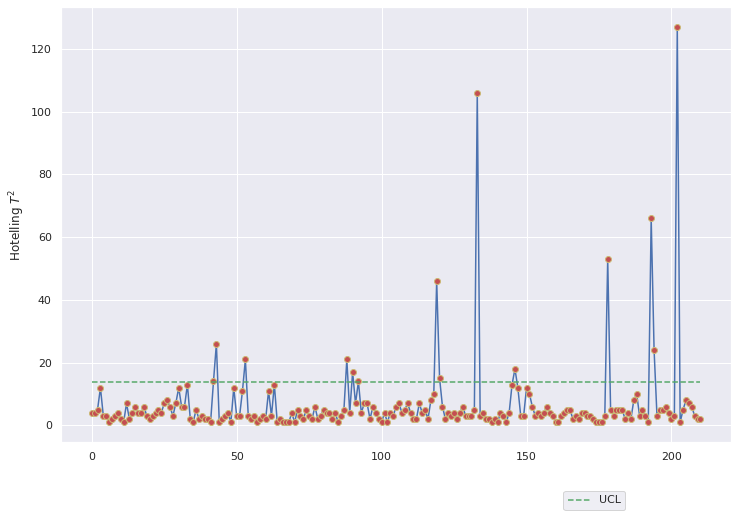

In [32]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [33]:
print(np.argwhere(Tsquare>UCL))

[[ 42]
 [ 43]
 [ 53]
 [ 88]
 [ 90]
 [ 92]
 [119]
 [120]
 [133]
 [146]
 [178]
 [193]
 [194]
 [202]]


**Control Charts for Principal Components**

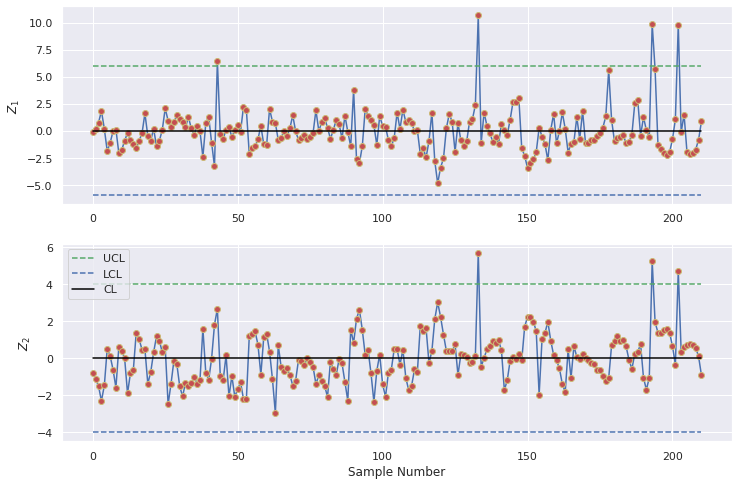

In [34]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

Out of Control Points

In [35]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 43]
 [133]
 [193]
 [202]]
[]
[[133]
 [193]
 [202]]


**Multi-Class Classification**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df, c, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, c, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], c, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 147
Test Dataset Size: 64


Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.921     0.972     0.946        36
           1      0.962     0.893     0.926        28

    accuracy                          0.938        64
   macro avg      0.941     0.933     0.936        64
weighted avg      0.939     0.938     0.937        64



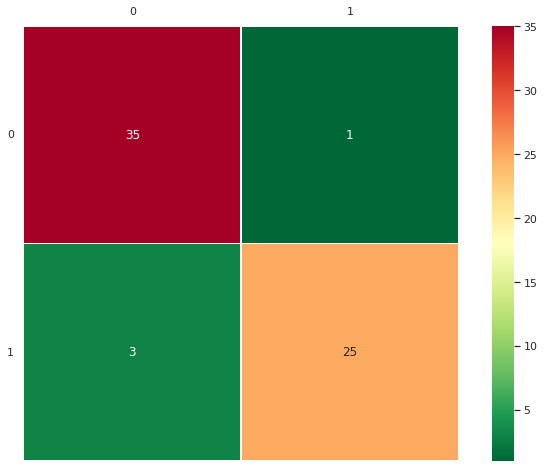

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.969     0.861     0.912        36
           1      0.844     0.964     0.900        28

    accuracy                          0.906        64
   macro avg      0.906     0.913     0.906        64
weighted avg      0.914     0.906     0.907        64



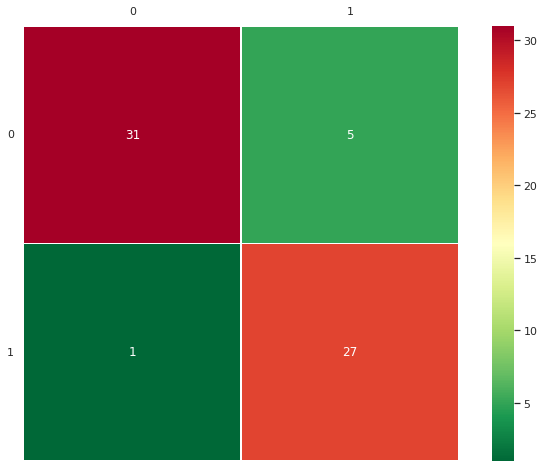

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.889     0.941        36
           1      0.875     1.000     0.933        28

    accuracy                          0.938        64
   macro avg      0.938     0.944     0.937        64
weighted avg      0.945     0.938     0.938        64



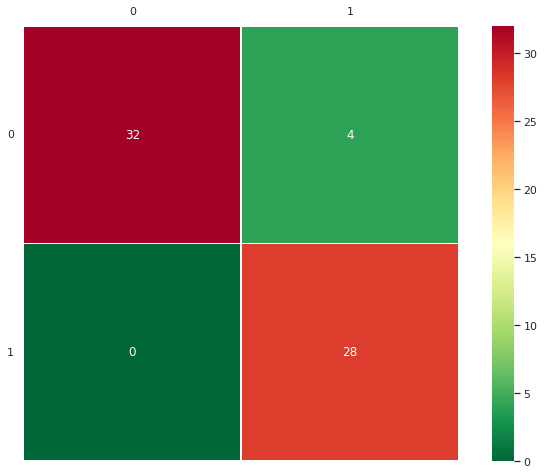

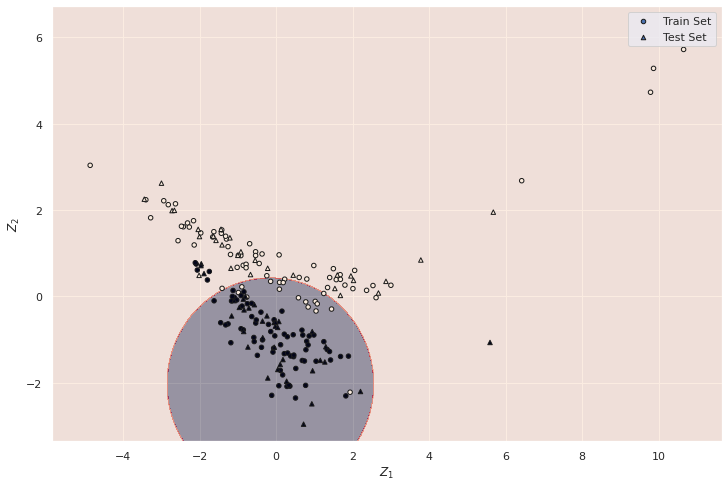

(array([ 3,  6, 30, 38]),)


In [37]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

**K Nearest Neighbors (KNN)**

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.002128  0.002084  0.002027  0.002149  0.002142
knn_Z  fit_time              0.000907  0.002092  0.003314  0.001390  0.001210
knn_Z12 fit_time             0.000848  0.000862  0.000827  0.000877  0.000837
knn_full_data test_f1_macro  0.966630  0.933036  1.000000  0.857843  0.965517
knn_Z  test_f1_macro         0.966630  0.933036  1.000000  0.857843  0.965517
knn_Z12 test_f1_macro        1.000000  0.966630  0.965517  0.894545  0.965517

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986        36
           1      1.000     0.964     0.982        28

    accuracy                          0.984        64
   macro avg      0.986     0.982     0.984        64
weighted avg      0.985     0.984   

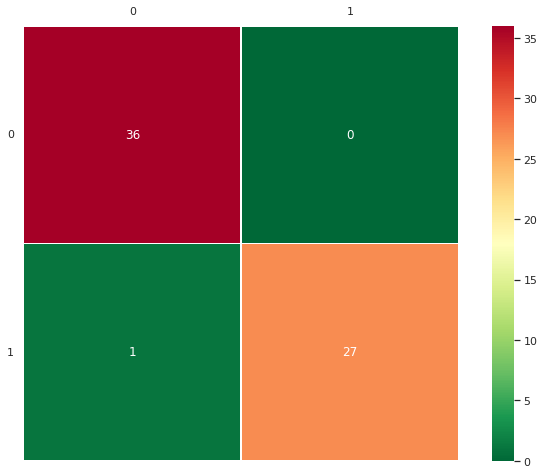

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986        36
           1      1.000     0.964     0.982        28

    accuracy                          0.984        64
   macro avg      0.986     0.982     0.984        64
weighted avg      0.985     0.984     0.984        64



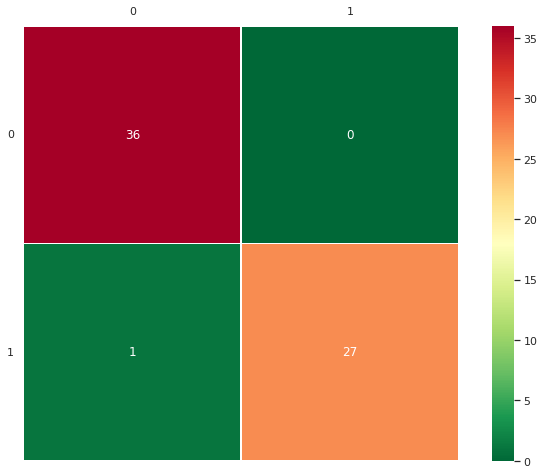

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.972     0.972     0.972        36
           1      0.964     0.964     0.964        28

    accuracy                          0.969        64
   macro avg      0.968     0.968     0.968        64
weighted avg      0.969     0.969     0.969        64



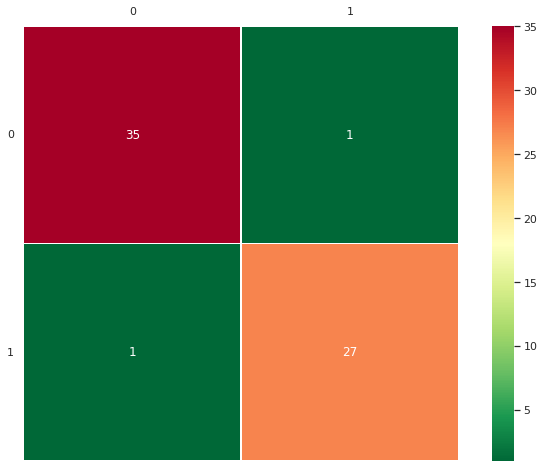

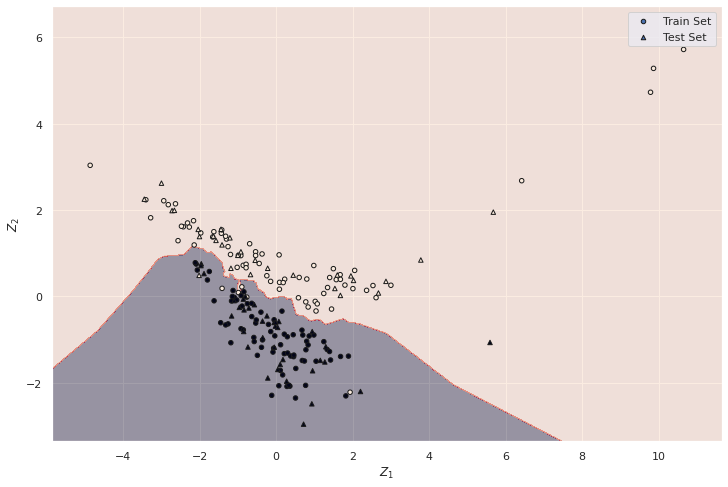

In [38]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

**Decision Trees (DT)**

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.002094  0.001943  0.001878  0.001813  0.001863
dt_Z  fit_time              0.000974  0.000965  0.000908  0.000853  0.000937
dt_Z12 fit_time             0.000751  0.000745  0.000734  0.000710  0.000782
dt_full_data test_f1_macro  1.000000  0.966630  0.965352  0.965352  1.000000
dt_Z  test_f1_macro         0.966630  0.866667  1.000000  0.896552  0.965517
dt_Z12 test_f1_macro        0.966630  0.833148  0.860577  0.827586  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.972     0.972     0.972        36
           1      0.964     0.964     0.964        28

    accuracy                          0.969        64
   macro avg      0.968     0.968     0.968        64
weighted avg      0.969     0.969    

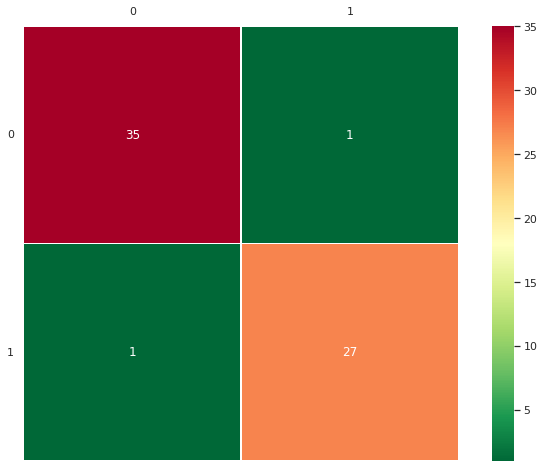

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.972     0.972     0.972        36
           1      0.964     0.964     0.964        28

    accuracy                          0.969        64
   macro avg      0.968     0.968     0.968        64
weighted avg      0.969     0.969     0.969        64



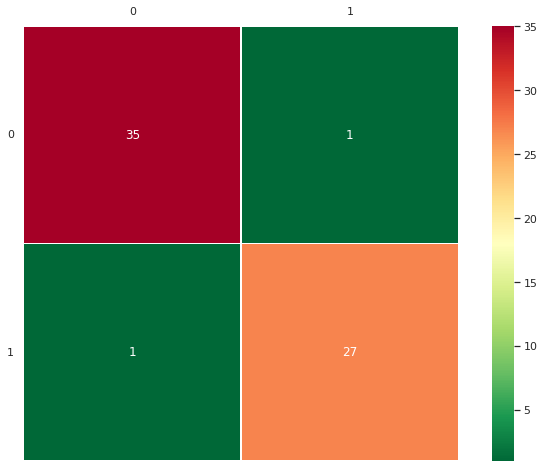

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.971     0.944     0.958        36
           1      0.931     0.964     0.947        28

    accuracy                          0.953        64
   macro avg      0.951     0.954     0.953        64
weighted avg      0.954     0.953     0.953        64



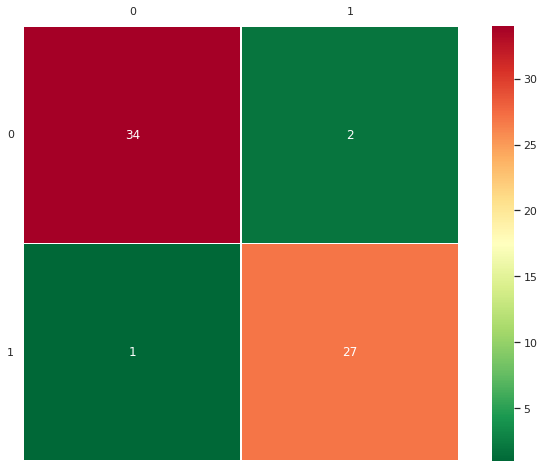

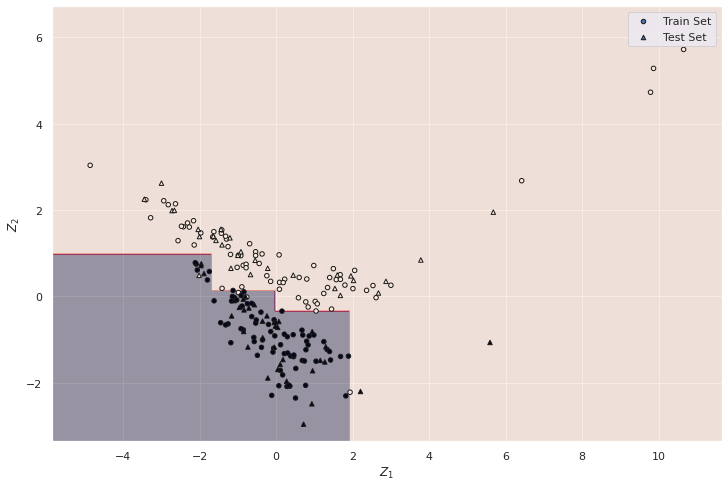

In [39]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

**ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


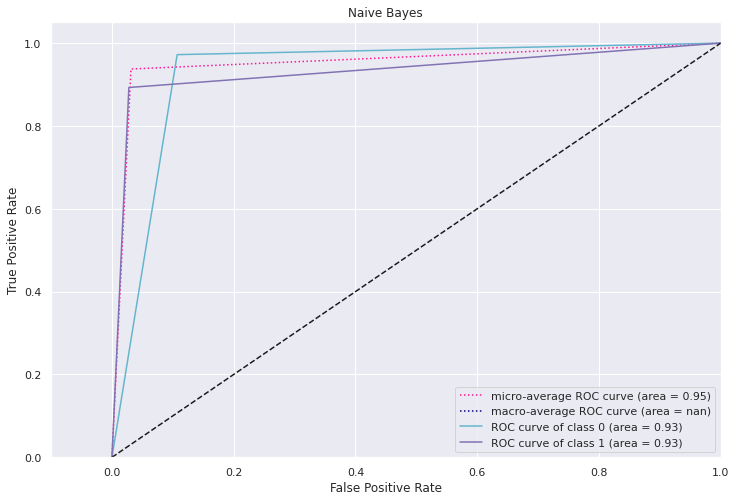

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


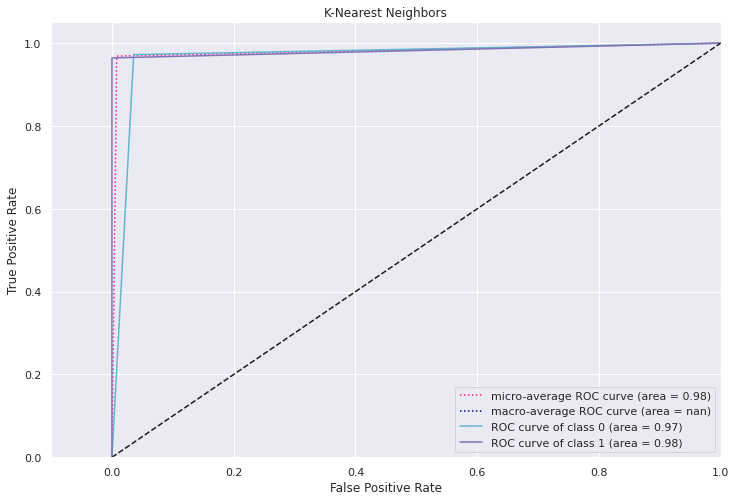

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


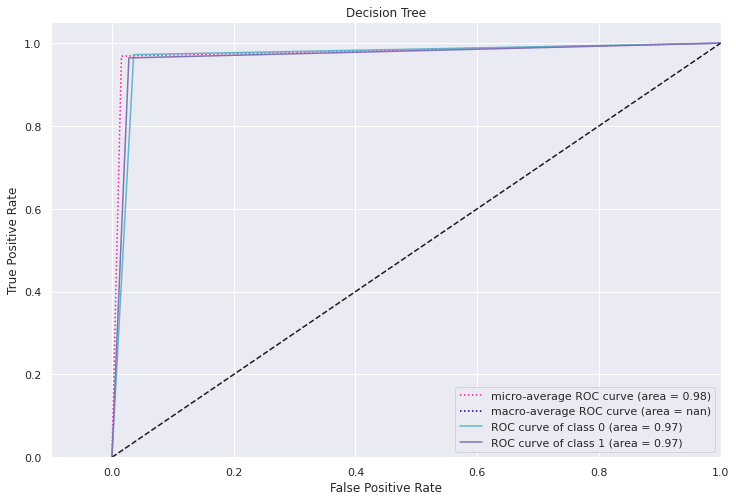

DATASET: Z


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


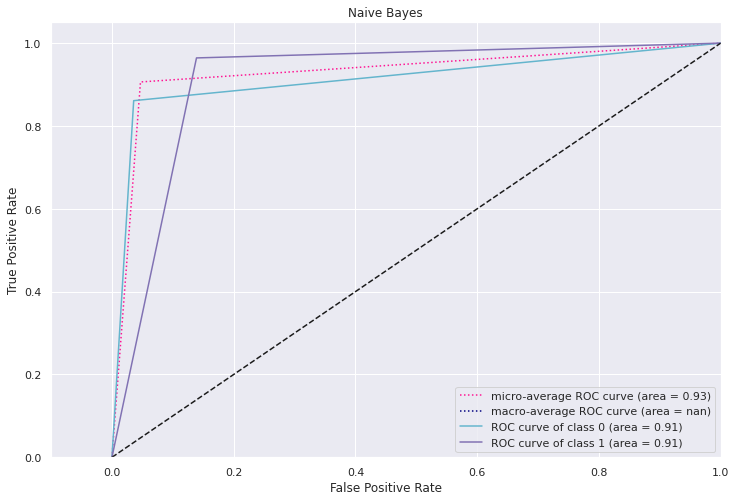

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


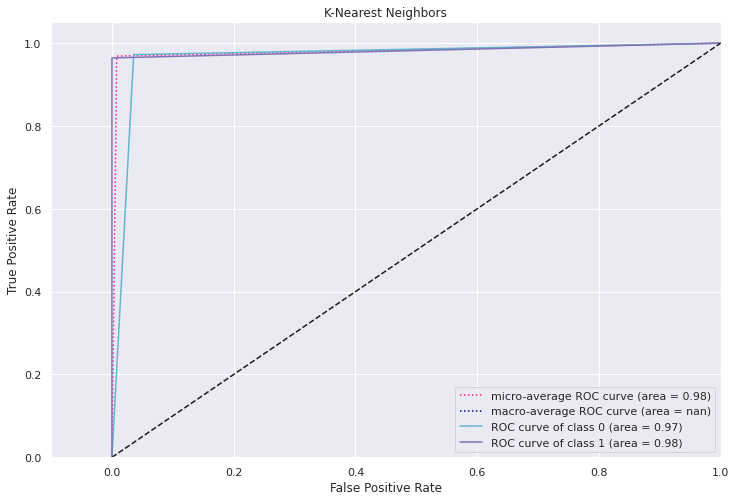

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


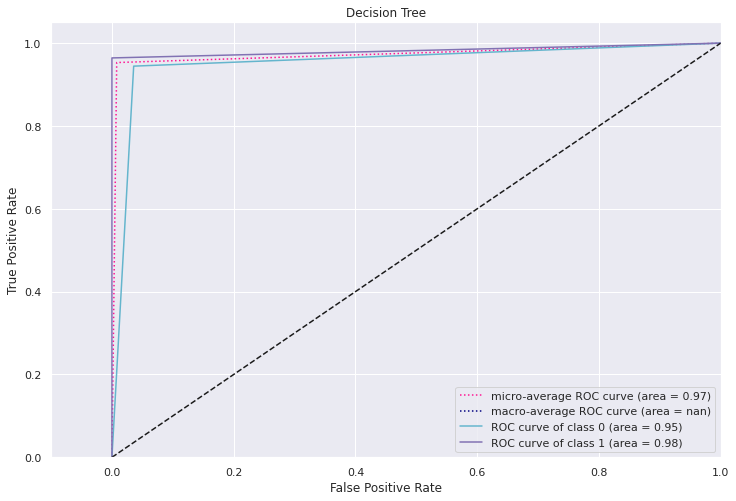

DATASET: Z12


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


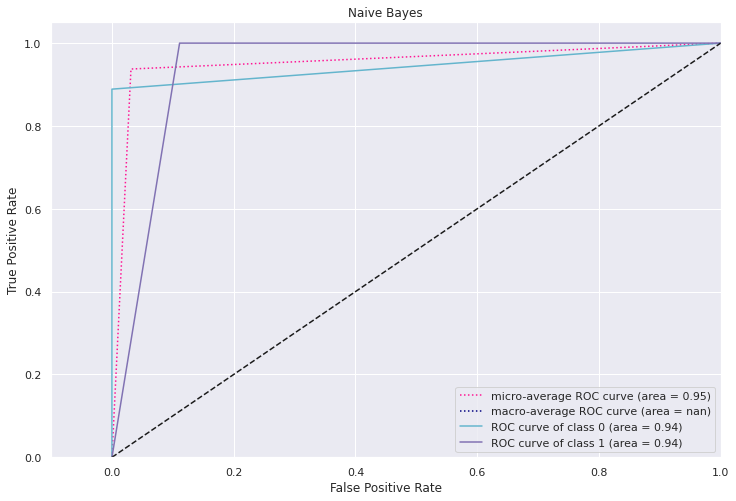

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


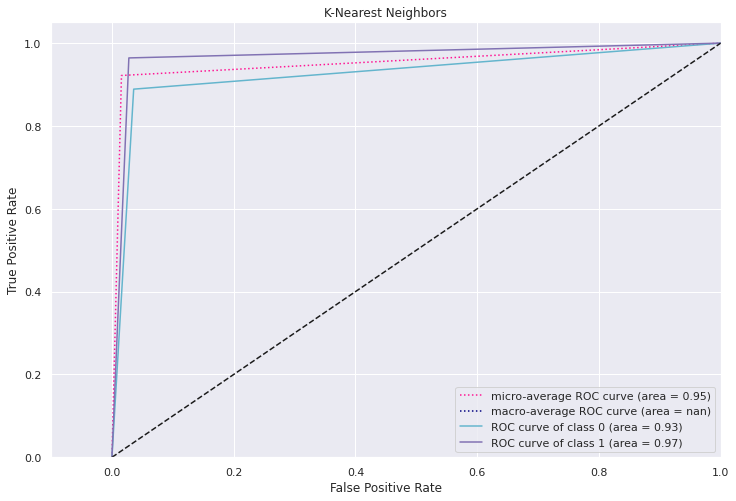

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


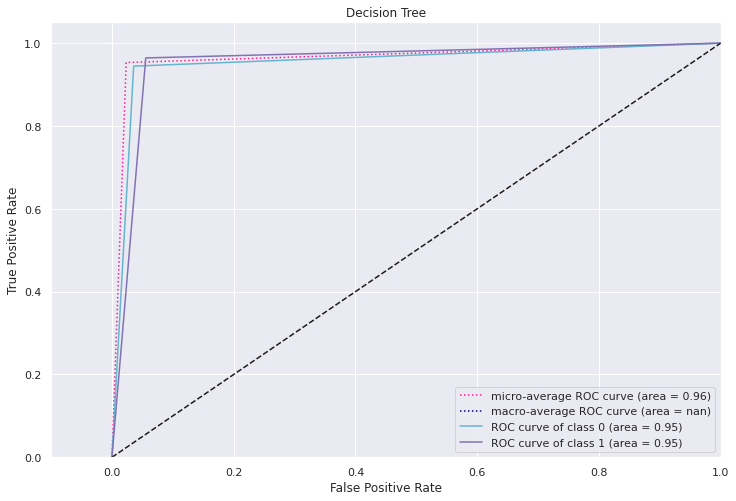

In [40]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes-1), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

**Bar Chart Plot- F1 scores**

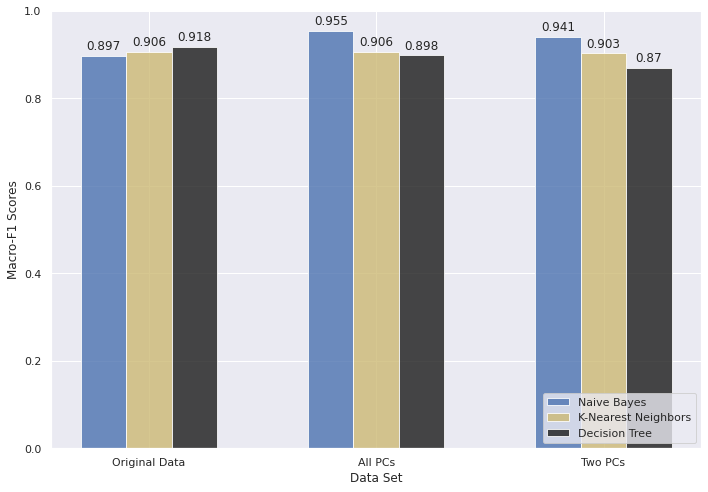

In [41]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()